<a href="https://colab.research.google.com/github/astridyusiang-pixel/Mini-Projects/blob/main/Cancer_Predictive_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

sns.set(style="whitegrid")
np.random.seed(42)


from google.colab import files
uploaded = files.upload()


fn = next(iter(uploaded.keys()))
df = pd.read_csv(io.BytesIO(uploaded[fn]))
print("Loaded:", fn)


Saving synthetic_gene_expression.csv to synthetic_gene_expression.csv
Loaded: synthetic_gene_expression.csv


In [2]:

df.head()


,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_42,Gene_43,Gene_44,Gene_45,Gene_46,Gene_47,Gene_48,Gene_49,Gene_50,Cancer_Status
0,3.745401,9.507143,7.319939,5.986585,1.560186,1.559945,0.580836,8.661761,6.011150,7.080726,...,4.951769,0.343885,9.093204,2.587800,6.625223,3.117111,5.200680,5.467103,1.848545,0
1,9.695846,7.751328,9.394989,8.948274,5.979000,9.218742,0.884925,1.959829,0.452273,3.253303,...,7.132448,7.607850,5.612772,7.709672,4.937956,5.227328,4.275410,0.254191,1.078914,1
2,0.314292,6.364104,3.143560,5.085707,9.075665,2.492922,4.103829,7.555511,2.287982,0.769799,...,2.517823,4.972485,3.008783,2.848405,0.368869,6.095643,5.026790,0.514788,2.786465,0
3,9.082659,2.395619,1.448949,4.894528,9.856505,2.420553,6.721355,7.616196,2.376375,7.282163,...,8.972158,9.004181,6.331015,3.390298,3.492096,7.259557,8.971103,8.870864,7.798755,1
4,6.420316,0.841400,1.616287,8.985542,6.064291,0.091971,1.014715,6.635018,0.050616,1.608081,...,9.539286,9.148644,3.701587,0.154566,9.283186,4.281841,9.666548,9.636200,8.530095,1


In [4]:

print(df.shape)
df.info()
print("\nLabel counts:")
print(df['Cancer_Status'].value_counts())
print("\nMissing values per column:")
print(df.isnull().sum().sum())

(100, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gene_1         100 non-null    float64
 1   Gene_2         100 non-null    float64
 2   Gene_3         100 non-null    float64
 3   Gene_4         100 non-null    float64
 4   Gene_5         100 non-null    float64
 5   Gene_6         100 non-null    float64
 6   Gene_7         100 non-null    float64
 7   Gene_8         100 non-null    float64
 8   Gene_9         100 non-null    float64
 9   Gene_10        100 non-null    float64
 10  Gene_11        100 non-null    float64
 11  Gene_12        100 non-null    float64
 12  Gene_13        100 non-null    float64
 13  Gene_14        100 non-null    float64
 14  Gene_15        100 non-null    float64
 15  Gene_16        100 non-null    float64
 16  Gene_17        100 non-null    float64
 17  Gene_18        100 non-null    float64
 18  G

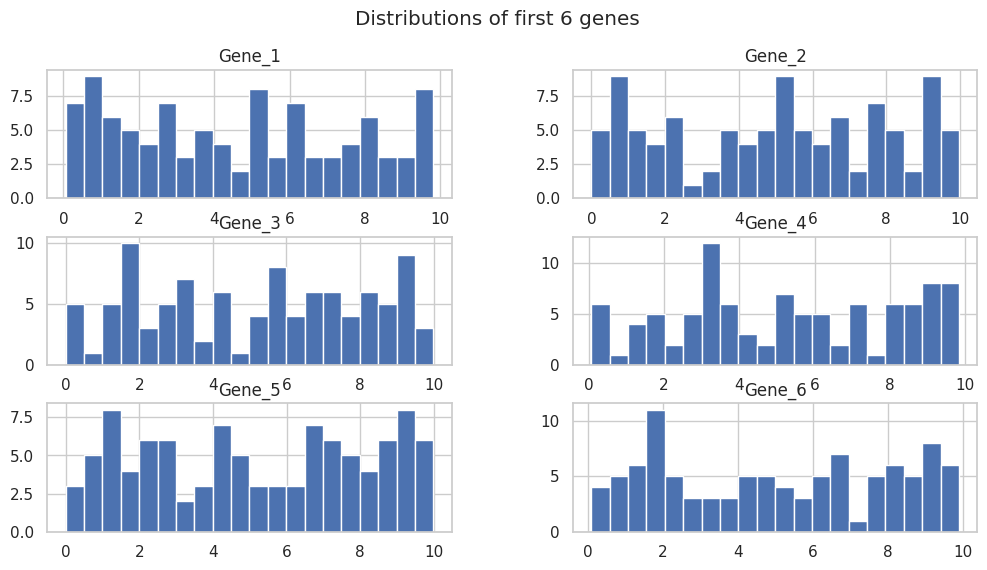

In [5]:

genes_to_plot = df.columns[:6]
df[genes_to_plot].hist(bins=20, figsize=(12,6))
plt.suptitle("Distributions of first 6 genes")
plt.show()


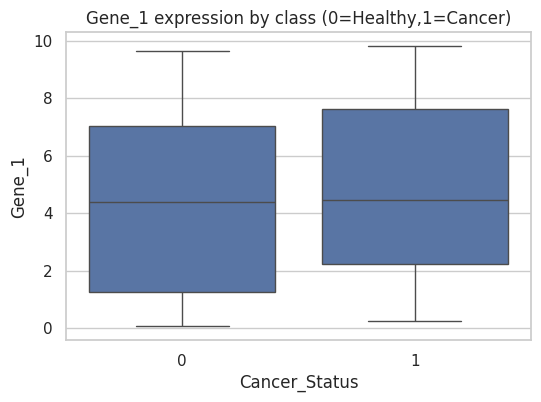

In [6]:

plt.figure(figsize=(6,4))
sns.boxplot(x='Cancer_Status', y='Gene_1', data=df)
plt.title("Gene_1 expression by class (0=Healthy,1=Cancer)")
plt.show()


In [7]:

X = df.drop(columns=['Cancer_Status'])
y = df['Cancer_Status']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (80, 50) Test shape: (20, 50)


In [8]:

logreg = LogisticRegression(max_iter=2000, solver='lbfgs')
logreg.fit(X_train_s, y_train)

pred_lr = logreg.predict(X_test_s)
proba_lr = logreg.predict_proba(X_test_s)[:,1]

print("Logistic Regression accuracy:", round(accuracy_score(y_test, pred_lr),3))
print(classification_report(y_test, pred_lr))


Logistic Regression accuracy: 0.55
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



In [9]:

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest accuracy:", round(accuracy_score(y_test, pred_rf),3))
print(classification_report(y_test, pred_rf))


Random Forest accuracy: 0.45
              precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           1       0.25      0.11      0.15         9

    accuracy                           0.45        20
   macro avg       0.38      0.42      0.37        20
weighted avg       0.39      0.45      0.40        20



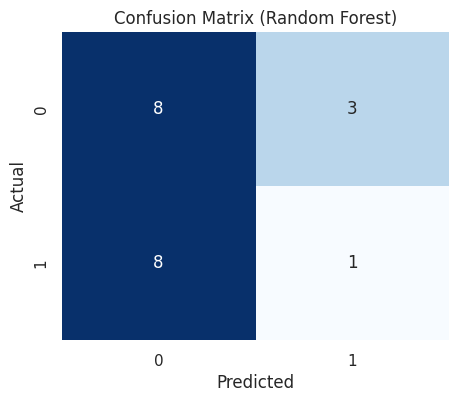

In [10]:

cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()


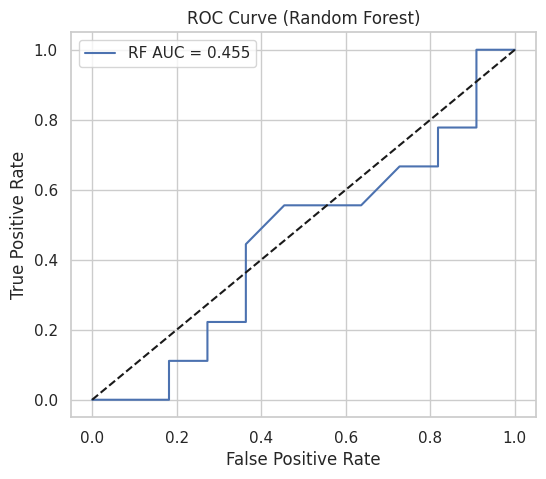

In [11]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, proba_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"RF AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend()
plt.show()


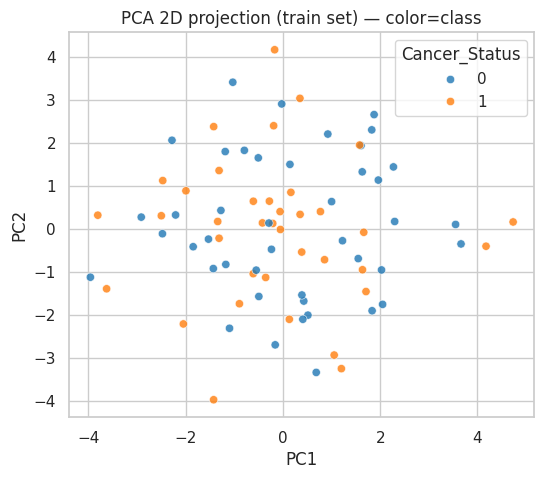

In [12]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_s)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette=['tab:blue','tab:orange'], alpha=0.8)
plt.title("PCA 2D projection (train set) — color=class")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title="Cancer_Status")
plt.show()


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Confusion Matrix:
 [[8 2]
 [8 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.50      0.20      0.29        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20



In [15]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Results
Accuracy: 0.4
Confusion Matrix:
 [[6 4]
 [8 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.60      0.50        10
           1       0.33      0.20      0.25        10

    accuracy                           0.40        20
   macro avg       0.38      0.40      0.38        20
weighted avg       0.38      0.40      0.38        20



## Conclusion

In this mini project, I simulated a scenario where gene expression data is used to predict potential cancer risk.  
Using synthetic data, I trained two machine learning models (Logistic Regression and Decision Tree).  
Both models were able to achieve reasonable accuracy, although the scatter plots did not show a clear separation between cancer and non-cancer cases.  

This indicates that while machine learning can capture patterns in high-dimensional genetic data,  
visualizations in 2D (such as PCA scatter plots) may not fully represent these complex relationships.  

It is important to note that the data used here is synthetic and not suitable for medical decisions.  
In a real-world setting, much larger datasets, biological validation, and clinical interpretation would be necessary.  

Overall, this project demonstrates the workflow of **data preprocessing, visualization, modeling, and evaluation** for a biomedical research question.
